In [5]:
import pickle as pkl
import pandas as pd
import numpy as np
import seaborn as sns
import os, sys
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from scipy.special import boxcox1p
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

# Find and load the dataset
for dirname, _, filenames in os.walk('C:/Users/AVCI/Desktop/CODE/Github/Customer-Abandonment-Analysis'):
    for filename in filenames:
        if filename == "Customer-Abandonment-Analysis-Data.csv":
            data_path = os.path.join(dirname, filename)

dataset = pd.read_csv(data_path)
dataset.head()

,ID,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,Session_ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,Session_ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,Session_ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,Session_ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         4284 non-null   object 
 1   Is_Product_Details_viewed  4284 non-null   object 
 2   Session_Activity_Count     4284 non-null   int64  
 3   No_Items_Added_InCart      4275 non-null   float64
 4   No_Items_Removed_FromCart  4284 non-null   int64  
 5   No_Cart_Viewed             4275 non-null   float64
 6   No_Checkout_Confirmed      4284 non-null   int64  
 7   No_Checkout_Initiated      4284 non-null   int64  
 8   No_Cart_Items_Viewed       4284 non-null   int64  
 9   No_Customer_Login          4284 non-null   int64  
 10  No_Page_Viewed             4284 non-null   int64  
 11  Customer_Segment_Type      4284 non-null   int64  
 12  Cart_Abandoned             4284 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage:

In [31]:
dataset.Cart_Abandoned=pd.Categorical(dataset.Cart_Abandoned)
dataset.Customer_Segment_Type=pd.Categorical(dataset.Customer_Segment_Type)
dataset.dtypes

ID                             object
Is_Product_Details_viewed      object
Session_Activity_Count          int64
No_Items_Added_InCart         float64
No_Items_Removed_FromCart       int64
No_Cart_Viewed                float64
No_Checkout_Confirmed           int64
No_Checkout_Initiated           int64
No_Cart_Items_Viewed            int64
No_Customer_Login               int64
No_Page_Viewed                  int64
Customer_Segment_Type        category
Cart_Abandoned               category
dtype: object

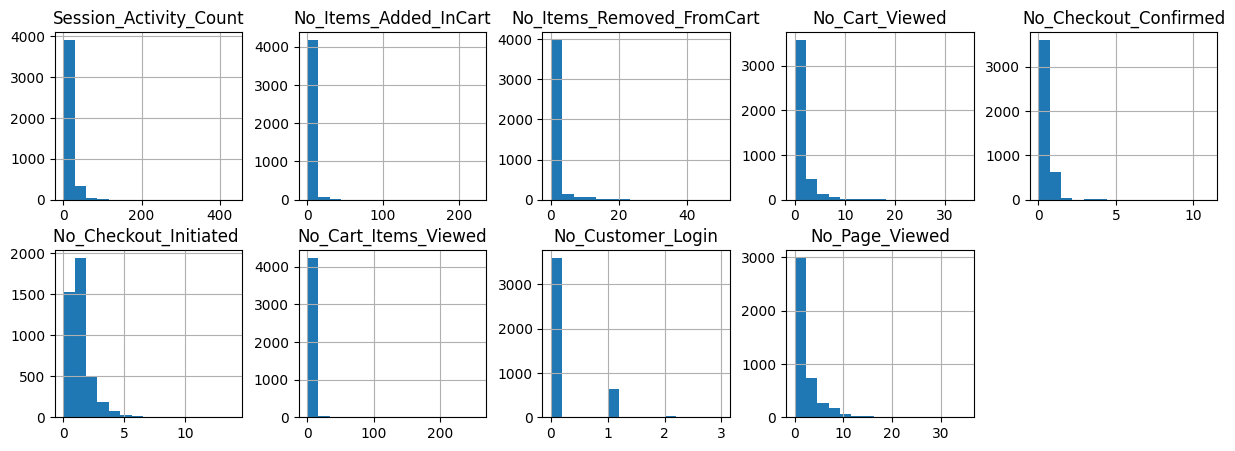

In [37]:
num=dataset.select_dtypes(include=["float64","int64"])
cat=dataset.select_dtypes(include=["object","category"]).drop(["ID"],axis=1)
num.hist(bins=15, figsize=(15, 5), layout=(2, 5));


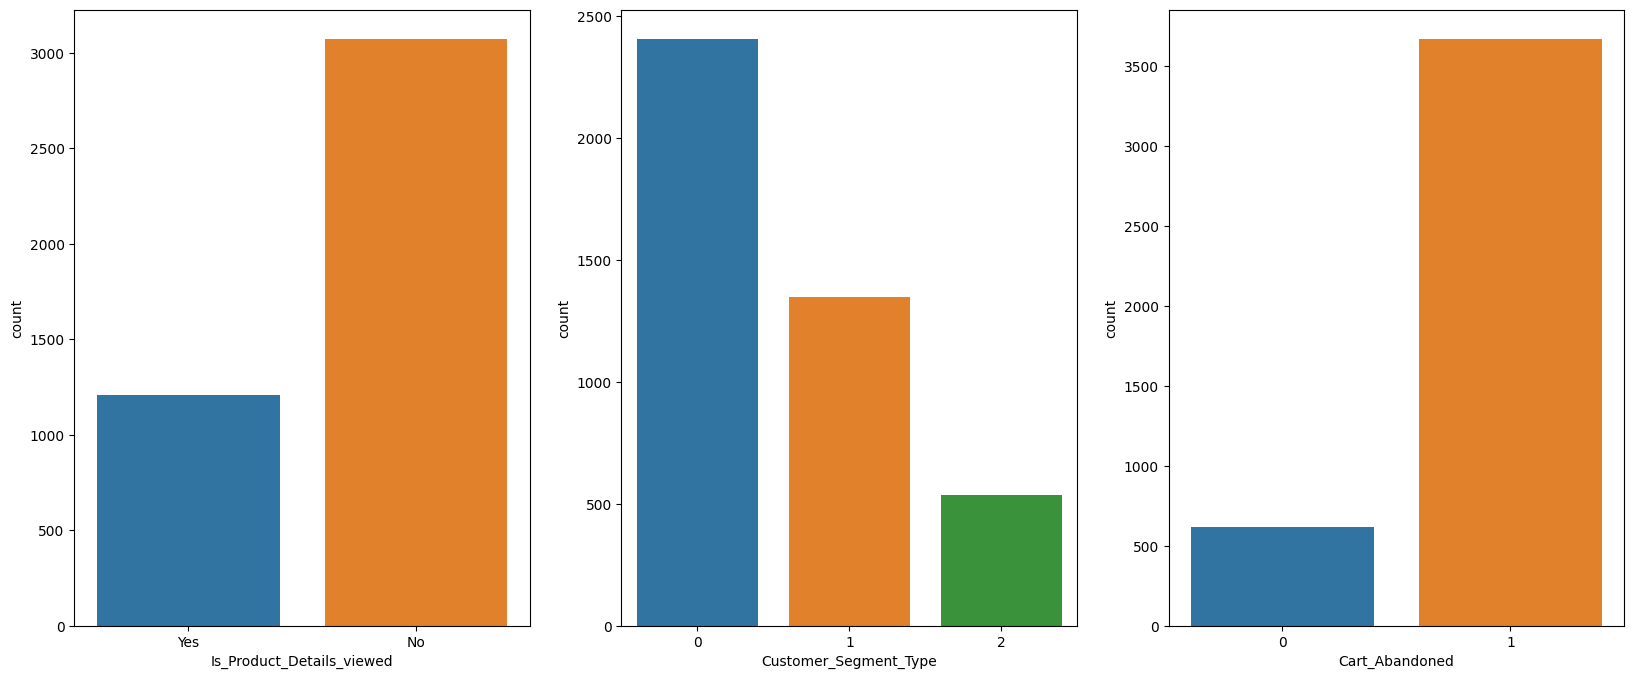

In [26]:
f, ax = plt.subplots(nrows=1,ncols=3,figsize=(20, 8))
for i,j in zip(cat.columns.tolist(), ax.flatten()):
    sns.countplot(x=cat[i],ax=j)

<Axes: xlabel='Is_Product_Details_viewed', ylabel='count'>

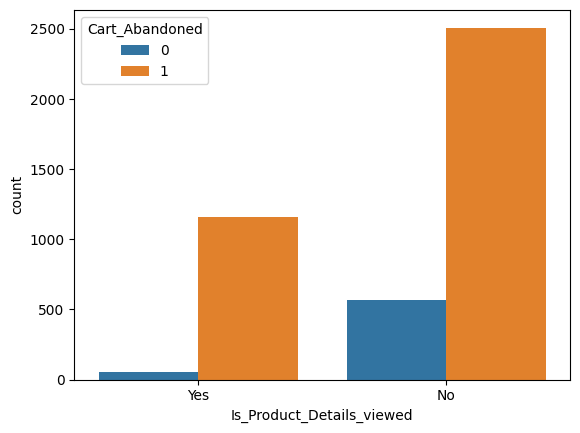

In [41]:
sns.countplot(x=dataset.Is_Product_Details_viewed,hue=dataset.Cart_Abandoned)



In [84]:
labels=dataset.loc[:,'No_Checkout_Confirmed'].values

for i in range(labels.shape[0]):
    if (labels[labels==int(i)].shape[0]!=0):
        print("No_Checkout_Confirmed ="+str(i) + " "  + str(labels[labels==int(i)].shape[0]))

No_Checkout_Confirmed = 0 3597
No_Checkout_Confirmed = 1 624
No_Checkout_Confirmed = 2 42
No_Checkout_Confirmed = 3 9
No_Checkout_Confirmed = 4 5
No_Checkout_Confirmed = 5 3
No_Checkout_Confirmed = 6 1
No_Checkout_Confirmed = 7 1
No_Checkout_Confirmed = 8 1
No_Checkout_Confirmed = 11 1


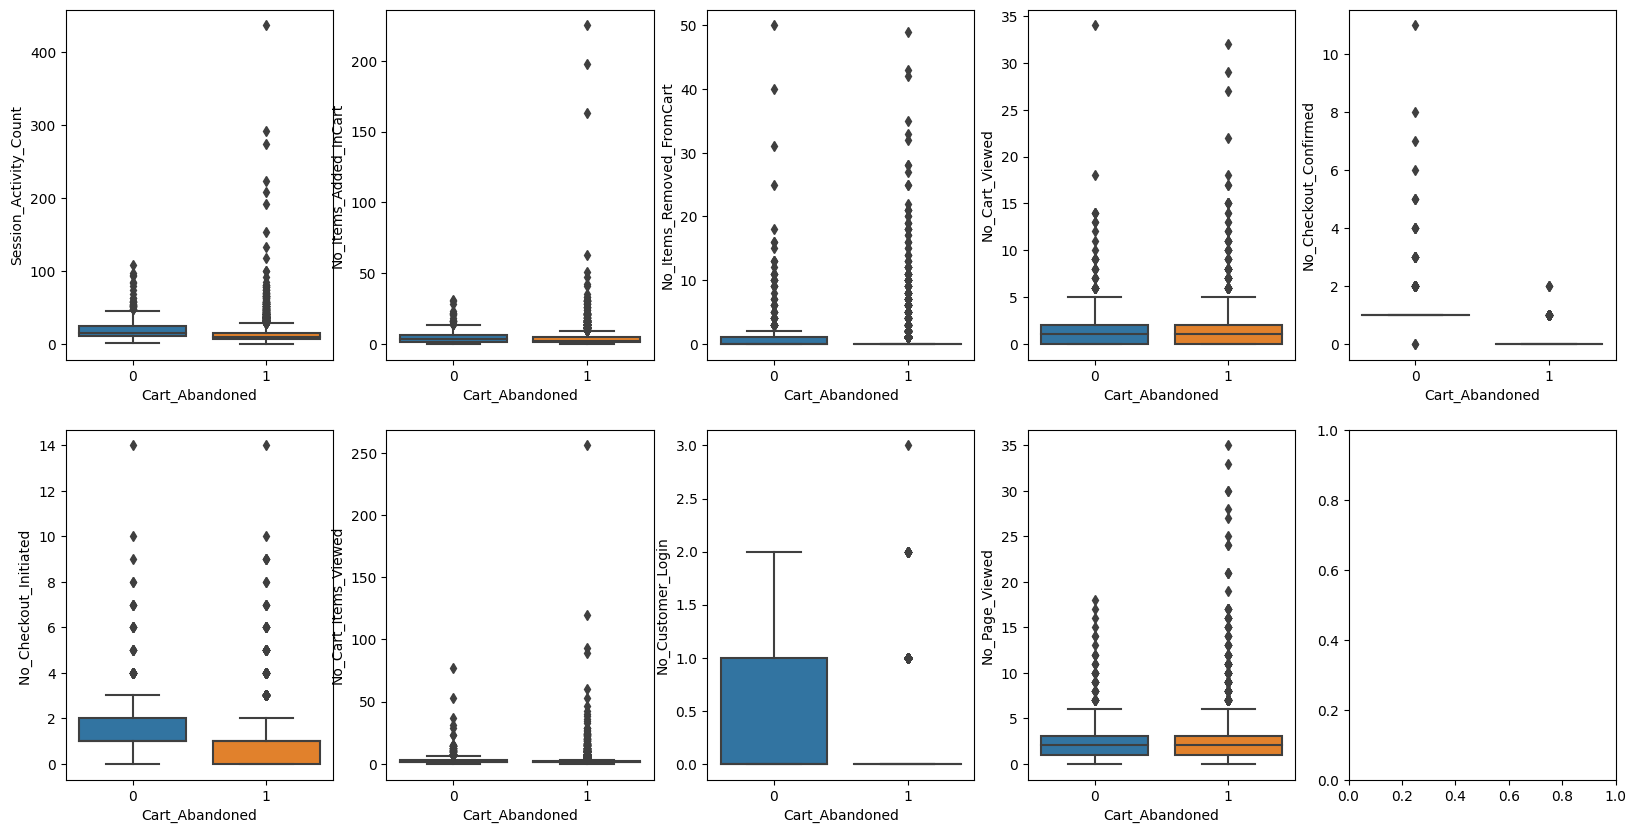

In [85]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for var, subplot in zip(num.columns.tolist(), ax.flatten()):
    sns.boxplot(x=cat["Cart_Abandoned"], y=num[var], ax=subplot)

<Axes: >

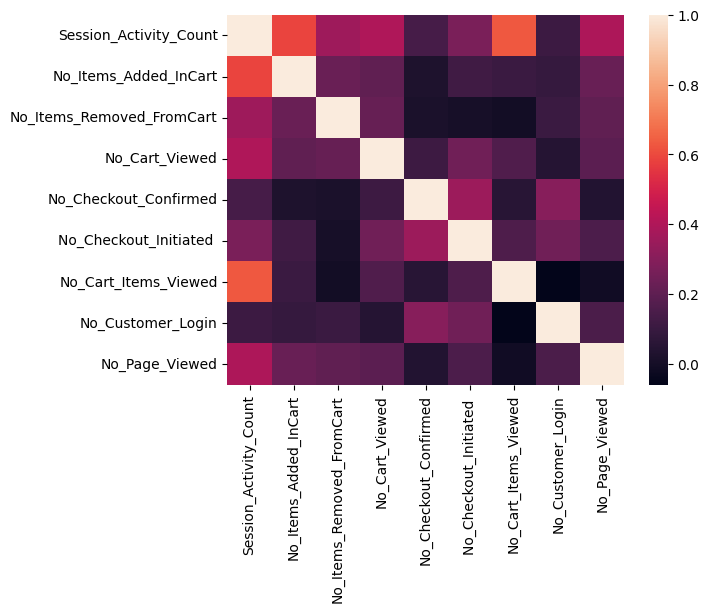

In [87]:
corrs = num.corr()
sns.heatmap(corrs)